In [8]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
dir =  "HTRU_2.csv"
df = pd.read_csv(dir, header=None)
df.rename(columns = {0:"Mean", 1:"STD", 2:"Kurtosis", 3:"Skewness", 8:"IsReal"}, inplace=True)
display(df)

,Mean,STD,Kurtosis,Skewness,4,5,6,7,IsReal
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [12]:
#Save and name the subsets of the data that contain background noise (noise_data) and actual pulsar detections (real_data).
noise_data = df.loc[df["IsReal"] == 0]
real_data = df.loc[df["IsReal"] == 1]

Text(0, 0.5, 'Density')

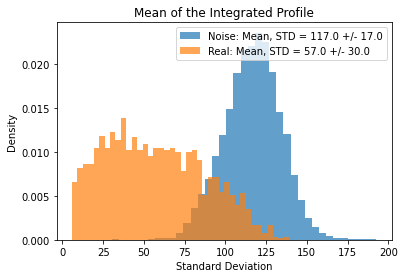

In [175]:
plt.hist(noise_data["Mean"], density=True, bins=40, alpha=0.7, label="Noise: Mean, STD = " + str(round(noise_data["Mean"].mean(), 0)) + " +/- " + str(round(noise_data["Mean"].std(), 0)));
plt.hist(real_data["Mean"], density=True, bins=40, alpha=0.7, label="Real: Mean, STD = " + str(round(real_data["Mean"].mean(), 0)) + " +/- " + str(round(real_data["Mean"].std(), 0)));
plt.title("Mean of the Integrated Profile")
plt.legend()
plt.xlabel("Standard Deviation")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

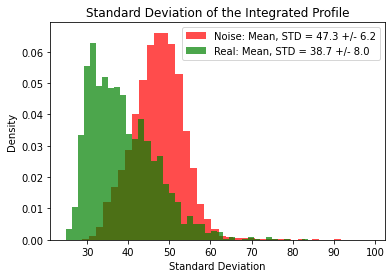

In [171]:
plt.hist(noise_data["STD"], density=True, bins=40, alpha=0.7, color="red", label="Noise: Mean, STD = " + str(round(noise_data["STD"].mean(), 1)) + " +/- " + str(round(noise_data["STD"].std(), 1)));
plt.hist(real_data["STD"], density=True, bins=40, alpha=0.7, color="green", label="Real: Mean, STD = " + str(round(real_data["STD"].mean(), 1)) + " +/- " + str(round(real_data["STD"].std(), 1)));
plt.title("Standard Deviation of the Integrated Profile")
plt.legend()
plt.xlabel("Standard Deviation")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

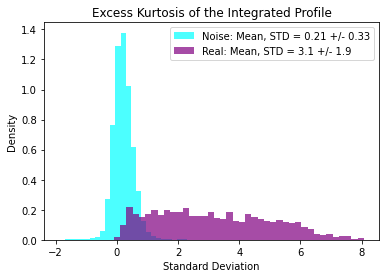

In [173]:
plt.hist(noise_data["Kurtosis"], density=True, bins=40, alpha=0.7, color="cyan", label="Noise: Mean, STD = " + str(round(noise_data["Kurtosis"].mean(), 2)) + " +/- " + str(round(noise_data["Kurtosis"].std(), 2)));
plt.hist(real_data["Kurtosis"], density=True, bins=40, alpha=0.7, color="purple", label="Real: Mean, STD = " + str(round(real_data["Kurtosis"].mean(), 1)) + " +/- " + str(round(real_data["Kurtosis"].std(), 1)));
plt.title("Excess Kurtosis of the Integrated Profile")
plt.legend()
plt.xlabel("Standard Deviation")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

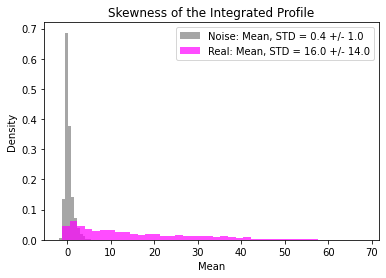

In [174]:
plt.hist(noise_data["Skewness"], density=True, bins=40, alpha=0.7, color="gray", label="Noise: Mean, STD = " + str(round(noise_data["Skewness"].mean(), 1)) + " +/- " + str(round(noise_data["Skewness"].std(), 1)));
plt.hist(real_data["Skewness"], density=True, bins=40, alpha=0.7, color="magenta", label="Real: Mean, STD = " + str(round(real_data["Skewness"].mean(), 0)) + " +/- " + str(round(real_data["Skewness"].std(), 0)));
plt.title("Skewness of the Integrated Profile")
plt.legend()
plt.xlabel("Mean")
plt.ylabel("Density")

In [194]:
#Calculate the probability that an observation is a pulsar candidate, P(A). In other words, if an observation from the HTRU dataset
#is chosen at random, what is the probability that it is a real pulsar?
pA = len(real_data) / (len(real_data) + len(noise_data))
print("pA: ", pA)

#Calculate the probability than an observation with Mean of the integrated profile < 80, P(B).
mean = df["Mean"]
pB =  len(mean[mean < 80]) / len(df)
print("pB: ", pB)

#Calculate the probability that an observation satisfies both conditions, P(A ⋂ B).
pC =  len(df[(mean < 80) & (df["IsReal"] == 1)]) / len(df)
print("pC: ", pC)

pA:  0.09157447759526204
pB:  0.08626662196893507
pC:  0.06900212314225053


In [193]:
#Calculate the first conditional probability - P(real | mean < 80).
pD = pC / pB
print("pD: ", pD)

#Calculate the second conditional probability - P(mean < 80 | real).
pE = pC / pA
print("pE: ", pE)

pD:  0.7998704663212436
pE:  0.7535082367297132
